## Data pre-processing

## Download data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn

## Data's source: https://archive.ics.uci.edu/dataset/2/adult

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
len(X.columns) # there's a total of 14 features

14

In [6]:
# Merge X and Y together
merged_df = X.join(y)
merged_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Rename the data set
df = merged_df

In [8]:
# Drop all NA values
print(df.isna().sum()) # there are NA values in workclass, occupation, and native-country features
df1 = df.dropna()
df1.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Exploring the data

### Age

In [9]:
df1['age'].describe()

count    47621.000000
mean        38.640684
std         13.558961
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

It seems that the youngest age group is 17 yrs old and the oldest age group is 90 yrs old.

The average age is 39 yrs old with a standard deviation of 13.6. 

25% of the population are 28 yrs or younger.

50% of the population are 37 yrs or younger.

75% of the population are 48 yrs or younger.

The majority of the population (50%-75%) falls between 28 to 48 yrs old, which represents the middle age group.

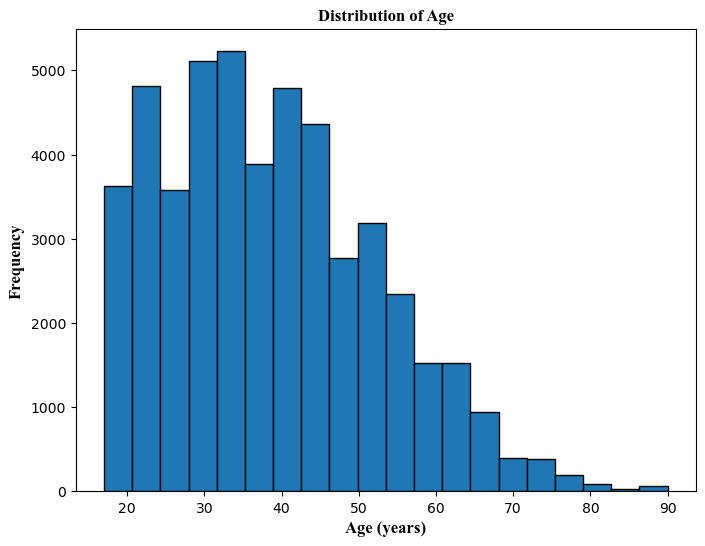

In [10]:
age_data = df['age']

plt.figure(figsize=(8,6))
plt.hist(age_data, bins= 20, edgecolor = 'black')
plt.xlabel('Age (years)', fontdict= {'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.ylabel('Frequency', fontdict= {'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.title('Distribution of Age', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.show()

### Work-class

In [11]:
df1['workclass'].describe()

count       47621
unique          9
top       Private
freq        33717
Name: workclass, dtype: object

There are 9 unique categories in work-class. The most frequent category is Private with a frequency of 33,717 individuals. 'Private' refers to employees that work for private companies that are not controlled by the government. 

In [12]:
df1['workclass'].value_counts()

Private             33717
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
?                    1836
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked            7
Name: workclass, dtype: int64

It seems that one of the category is "?" and this requires further investigation.

In [13]:
df1[df1['workclass'] == "?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
question_mark_workclass = df1['workclass'] == '?'
question_mark_workclass.value_counts() # there are 45,785 individuals with a '?' in their workclass

question_mark_occupation = df1['occupation'] == '?' # there are 45,778 inviduals with a '?' in their occupation
question_mark_occupation.value_counts()

False    45778
True      1843
Name: occupation, dtype: int64

It seems that in the original df, there's a near-equal amount of missing values for workclass and occupation. This may suggest that those that don't have a clear working class may don't have an occupation. It makes sense because without a working class, there's no occupation. However, this could mean that because the amount of missing values are not identical between workclass and occupation, there might be a case where there's no working class for 3 occupations (45,785 vs. 45,778, respectively). It's best if we investigate this special case. 

In [15]:
df1[(df1['workclass'] != '?') & (df1['occupation'] == '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


The investigation in finding individuals who have an identified workingclass but not an identifed occupation reveals that those who never worked ought to never have an occupation. This makes sense because if a person is not working, then they would belong to a workclass category of "never-worked" and not have an occupation. 

A proposed solution to this would be to replace the '?' values for those who have one in the occupation BUT not in the workclass as 'unemployed'. This makes sense because it represents those in the workclass category of "never-worked" as having no occupation or 'unemployed'. The remaining individuals who have '?' in both occupation and workclass will be removed.

In [16]:
df2 = df1.copy()
df2.loc[(df2['workclass'] != '?') & (df2['occupation'] == '?'), 'occupation'] = 'Unemployed' # replace those in the workclass "never-worked" with unemployed as their occupation

df2 = df2[~((df2['workclass'] == '?') & (df2['occupation'] == '?'))]

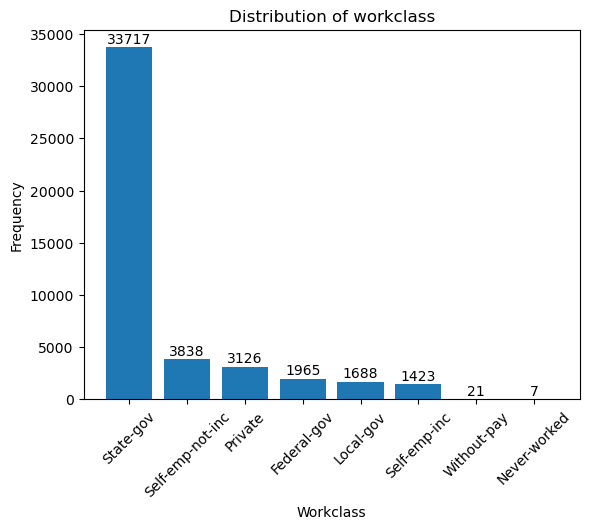

In [17]:
# Create a bar chart showing the frequencies for each category
workclass_counts = df2['workclass'].value_counts()
workclass_category = df2['workclass'].unique()

plt.bar(x=workclass_category, height=workclass_counts)
# Add counts on top of each bar
for i, count in enumerate(workclass_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=10)
plt.title('Distribution of workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

### Education

In [18]:
df2['education'].value_counts()

HS-grad         14912
Some-college     9998
Bachelors        7708
Masters          2562
Assoc-voc        1973
11th             1628
Assoc-acdm       1519
10th             1236
7th-8th           840
Prof-school       801
9th               684
12th              593
Doctorate         567
5th-6th           464
1st-4th           227
Preschool          73
Name: education, dtype: int64

In [19]:
df2['education-num'].value_counts()

9     14912
10     9998
13     7708
14     2562
11     1973
7      1628
12     1519
6      1236
4       840
15      801
5       684
8       593
16      567
3       464
2       227
1        73
Name: education-num, dtype: int64

List of education number: 
1. Preschool
2. 1st-4th grade
3. 5-6th grade
4. 7-8th grade
5. 9th grade
6. 10th grade
7. 11th grade
8. 12th grade
9. HS-grad
10. Some-college
11. Assoc-voc
12. Assoc-acdm
13. Bachelors
14. Masters
15. Prof-school
16. Doctorate

In [20]:
# Group educational level into preschool, primary school (1st to 8th), high school (9th-12th), HS-grad, Assoc-voc, -acdm, some-college, Bachelors, masters, Prof-school, doctorate
df2_5 = df2.copy()
df2_5.loc[(df2['education'] == '1st-4th') | (df2['education'] == '5th-6th') | (df2['education'] == '7th-8th'), 'education'] = 'Primary school'
df2_5.loc[(df2['education'].isin(['Assoc-voc', 'Assoc-acdm'])),'education'] = 'Associates'
df2_5.loc[(df2['education'].isin(['Prof-school', 'Doctorate'])),'education'] = 'Doctorate'
df2_5.loc[(df2['education-num'].isin([2,3,4])),'education-num'] = 2
df2_5.loc[(df2['education'].isin(['9th', '10th', '11th', '12th'])),'education'] = 'High school'
df2_5.loc[(df2['education-num'].isin([5,6,7,8])),'education-num'] = 3
df2_5.loc[(df2['education-num'] == 9),'education-num'] = 4
df2_5.loc[(df2['education-num'] == 10),'education-num'] = 5
df2_5.loc[((df2['education-num'] == 11) | (df2['education-num'] == 12)),'education-num'] = 6
df2_5.loc[(df2['education-num'] == 13),'education-num'] = 7
df2_5.loc[(df2['education-num'] == 14),'education-num'] = 8
df2_5.loc[((df2['education-num'] == 15) | (df2['education-num'] == 16)),'education-num'] = 9

#df2_5['education'].value_counts()
df2_5['education-num'].value_counts()

4    14912
5     9998
7     7708
3     4141
6     3492
8     2562
2     1531
9     1368
1       73
Name: education-num, dtype: int64

In [21]:
df2_5['education'].unique()

array(['Bachelors', 'HS-grad', 'High school', 'Masters', 'Some-college',
       'Associates', 'Primary school', 'Doctorate', 'Preschool'],
      dtype=object)

New education number:
1. Preschool
2. Primary school
3. High school
4. HS-grad
5. Associates 
6. Some-college
7. Bachelors
8. Masters
9. Doctorate

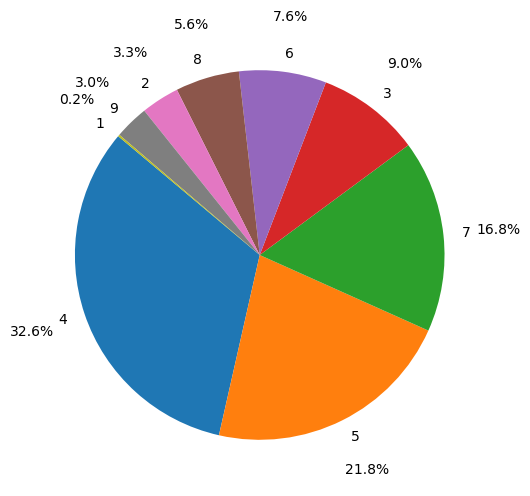

In [22]:
# Create a pie chart that calculates the frequency of each education level
education_counts = df2_5['education-num'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=1.3)
plt.show()

Since education-num is the same as education because each number refers to a specific category, removing the education column is a good solution because it already does us a favor in encoding categories into numerical representations. 

In [23]:
df3 = df2_5.drop(['education'], axis='columns')
df3.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,7,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,4,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,7,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Race

In [24]:
df3['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

There are 5 categories, but what is missing is the Hispanic race, therefore, introducing the data set's first limitation. The resulting model is unable to be generalized to a wider population of the world because it doesn't make Hispanic its own race but rather have it belonged to the Other category along with other unmentioned races. This creates a generalizability problem because Hispanic should have their own separate category, considering how they make up a substantial proportion in the population.

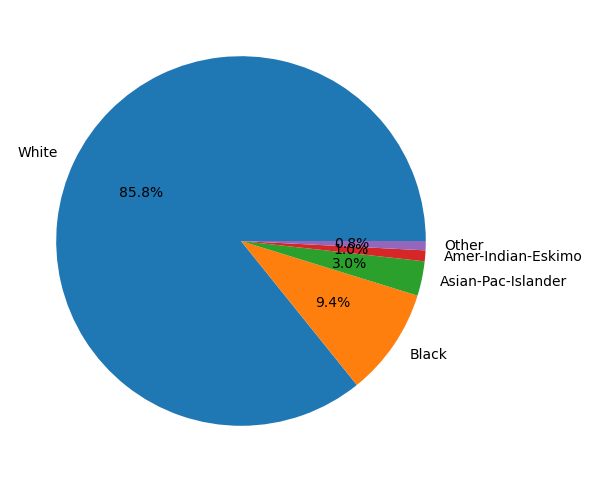

In [25]:
race_data = df3['race']
race_name = race_data.unique()
race_counts = race_data.value_counts()
race_counts

plt.figure(figsize=(8,6))
plt.pie(race_counts, labels=race_name, autopct='%1.1f%%', startangle=360)
plt.show()

Most of the individuals in this data set are white (85.8%) with the second highest group is Black (9.4%). 

### Capital gain and loss

Capital gain and loss essentially seem to be similar to someone's networth where capital gain represents one's profit and capital loss represents one's financial losses. These two features enables us to understand a person's financial activities by examining their losses and gains from investments as well as their financial well-being. 

In [26]:
df3.groupby('native-country')['capital-gain'].mean().sort_values(ascending = False)

native-country
India                         3283.367347
Taiwan                        2302.890909
Japan                         1883.988764
?                             1867.097122
Philippines                   1572.802120
Iran                          1570.000000
China                         1519.858407
Canada                        1320.588957
England                       1148.924370
Germany                       1133.595855
Greece                        1131.448980
United-States                 1126.567907
Dominican-Republic            1105.484536
Yugoslavia                     916.391304
South                          899.900990
Italy                          837.790000
Cambodia                       751.115385
Vietnam                        626.662651
Hong                           536.571429
Hungary                        517.555556
Ireland                        508.527778
Cuba                           488.233083
France                         440.666667
Mexico             

Grouping individuals by countries reveals that Indians have the highest average capital gains of $3,283 while the U.S. has an average capital gain of $1,127. It's interesting to see people from countries like Scotland and Netherlands to have $0 capital gains. 

In [27]:
df3.groupby('native-country')['capital-loss'].mean().sort_values(ascending = False)

native-country
Holand-Netherlands            2205.000000
Hong                           273.714286
China                          184.247788
Greece                         174.857143
Trinadad&Tobago                162.538462
Honduras                       160.000000
Cambodia                       148.192308
Canada                         146.447853
Iran                           131.071429
India                          118.557823
?                              118.080935
England                        116.235294
Taiwan                         114.436364
South                          114.019802
Puerto-Rico                    110.165714
Ireland                         98.861111
Hungary                         92.666667
Philippines                     92.275618
United-States                   90.050025
Vietnam                         89.493976
Laos                            82.857143
Haiti                           71.956522
Nicaragua                       71.395833
Columbia           

Looking at capital losses however, people from countries like the Netherlands have the highest average capital losses of $2,205 while the U.S. has an average of $90.1 of capital losses. 

/var/folders/71/z1p57v9j3xx9mtyxfmr4bw5m0000gn/T/ipykernel_4048/1390093928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['net-capital'] = df4['capital-gain'] - df4['capital-loss']


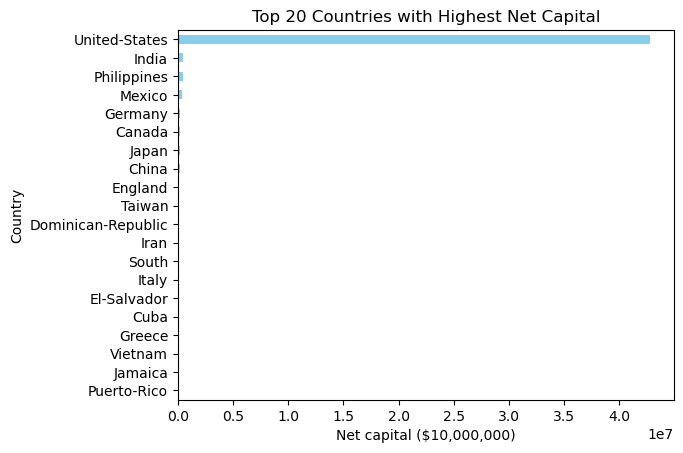

<Figure size 800x600 with 0 Axes>

In [28]:
# Create a horizontal bar chart showing the top 20 countries and their capital net (gains - losses)
df4 = df3[~(df3['native-country'] == '?')]
df4['net-capital'] = df4['capital-gain'] - df4['capital-loss']

country_total_net = df4.groupby('native-country')['net-capital'].sum()

top_20_countries = country_total_net.nlargest(20) # sort for the first 20 countries with the highest capital net

top_20_countries.sort_values().plot(kind = "barh", stacked=False,color="skyblue")
plt.xlabel('Net capital ($10,000,000)')
plt.ylabel('Country')
plt.title('Top 20 Countries with Highest Net Capital')
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.show()

### Sex

In [29]:
df4['sex'].value_counts()

Male      30532
Female    14697
Name: sex, dtype: int64

In this dataset, there are more males (67.5%) than females(32.5%).

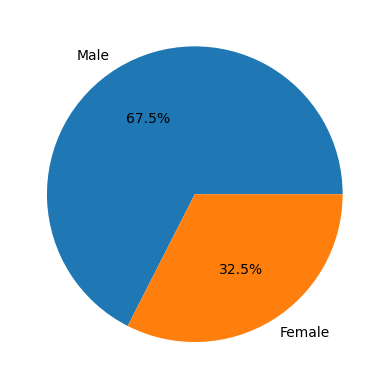

In [30]:
sex_counts = df4['sex'].value_counts()

plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.show()

### Native country

In [31]:
df4.groupby('native-country')['native-country'].count().sort_values(ascending=False)

native-country
United-States                 41299
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In this dataset, most individuals originated from the U.S. (41,299) with Mexico as the second country with the most people originated from (903).

## Feature selection

Before transitioning to model selection, first, it is important to select features that we believe to be important in predicting a person's income.

In [32]:
df4.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,net-capital
0,39,State-gov,77516,7,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,4,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,7,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


To find outliers, I'm interested in exploring the relationship between a person's income and the number of hours they work per week

In [33]:
# Fix the income labels as only either <=50k or >50k.
df4['income'] = df4['income'].str.replace('\.$', '', regex=True)

/var/folders/71/z1p57v9j3xx9mtyxfmr4bw5m0000gn/T/ipykernel_4048/2472989797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['income'] = df4['income'].str.replace('\.$', '', regex=True)


In [34]:
df4['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [35]:
hr_week_and_income = df4[['hours-per-week', 'income','age']] # create a sub df that only contains hrs/week and income
hr_week_and_income.head()

,hours-per-week,income,age
0,40,<=50K,39
1,13,<=50K,50
2,40,<=50K,38
3,40,<=50K,53
4,40,<=50K,28


In [36]:
hr_week_and_income['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [37]:
# Dummy code income into 0 (<=50k) and 1 (>50k)
encoded_income = pd.get_dummies(df4['income'], prefix='income')
result_df = pd.concat([hr_week_and_income, encoded_income], axis=1)
result_df

# merge the two income columns together
result_df['income'] = (result_df['income_>50K'] * 1)

In [38]:
result_df = result_df.drop(['income_<=50K', 'income_>50K'], axis='columns')
result_df.head()

,hours-per-week,income,age
0,40,0,39
1,13,0,50
2,40,0,38
3,40,0,53
4,40,0,28


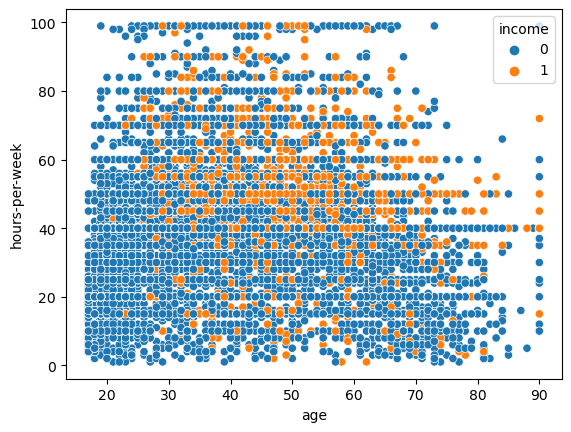

In [39]:
# Create a scatter plot between hours per week and income
import seaborn as sns
sns.scatterplot(data=result_df,x='age',y='hours-per-week',hue='income')
plt.show()

Based on this scatterplot, it seems like those who are in the age range between 30 and 60 and work in the range 40 and 60 hours per week tend make an income of over $50k. However, it is interesting to see that even those who are 90 years old still worked between 10 to 80 hours per week. Therefore, this requires further investigation to those in the age range from 70 to 90 to see what causes them to be still earning income and work long hours.

In [40]:
# Dummy income variable in df4 (0 is <=50K and 1 is >50K)
df5 = df4.copy()
df5['income'] = df5['income'].apply(lambda x: 0 if (x == '<=50K') else 1)
df5['income'].unique()

array([0, 1])

In [41]:
df5[(df5['age'] > 70) & (df5['income'] == 1)]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,net-capital
100,76,Private,124191,8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,0
872,71,Self-emp-not-inc,143437,8,Married-civ-spouse,Sales,Husband,White,Male,10605,0,40,United-States,1,10605
1645,71,Self-emp-inc,133821,4,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1,0
2003,72,Private,74141,3,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,1,0
2941,75,Private,200068,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47285,71,Self-emp-not-inc,139889,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,75,United-States,1,0
47301,81,Private,55314,7,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,4,United-States,1,0
47350,73,Private,35370,7,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,1,0
47649,90,Private,197613,4,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,1,0


In [42]:
df5[(df5['age'] > 70) & (df5['income'] == 1)]['net-capital'].mean()

8404.682539682539

It seems that those who are age above 70 years and make an income over $50K has a net capital of $8,405. With this fact, let's see what industry/occupation they work in that allows them to generate this high income.

In [52]:
old_people = df5[(df5['age'] > 70) & (df5['income'] == 1)]
old_people.head()

old_people_occupation_counts = old_people['occupation'].value_counts()
old_people_occupation_counts.apply(lambda x: (x/(len(old_people))*100))

Exec-managerial     29.365079
Prof-specialty      23.809524
Sales               21.428571
Adm-clerical        11.111111
Farming-fishing      6.349206
Craft-repair         4.761905
Protective-serv      1.587302
Other-service        0.793651
Transport-moving     0.793651
Name: occupation, dtype: float64

For individuals who are older than 70 and have an income of over $50k, 29.4% hold an executive mangagerial position, 23.8% hold a professor of specialty, 21.4% hold a sales position, and 11.1% hold an administration clerical position.

In [54]:
old_people['age'].mean()

76.31746031746032

With the fact that most of the individuals who are over 70 hold high-paying positions relating to administration and professorship, the average age of this group is 76. However, as we have seen in the scatterplot, there are 90-year-old people who still make high income. Let's investigate this fact. 

In [56]:
people_90 = old_people[old_people['age'] >= 90]
people_90.head()

len(people_90)

12

In this dataset, there are 12 people who are over 90 and made an income of over $50k. 

In [58]:
people_90['occupation'].value_counts()

Exec-managerial    4
Prof-specialty     3
Sales              2
Craft-repair       2
Adm-clerical       1
Name: occupation, dtype: int64

In [60]:
people_90['net-capital'].mean()

7906.25

In [98]:
people_90['workclass'].value_counts()

Private             9
Local-gov           2
Self-emp-not-inc    1
Name: workclass, dtype: int64

Most of the individuals, who are over 90 and make $50k, because they have private businesses. This makes sense because they could be owners of those private businesses, thereby having the ability to generate $50k or over.

In [61]:
people_90['net-capital'].describe()

count       12.0000
mean      7906.2500
std       8576.3737
min      -1825.0000
25%          0.0000
50%       7741.5000
75%      13771.2500
max      20051.0000
Name: net-capital, dtype: float64

In [64]:
people_90[people_90['net-capital'] == 20051]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,net-capital
5370,90,Local-gov,227796,8,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,1,20051
8806,90,Private,87372,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,1,20051
39980,90,Self-emp-not-inc,122348,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,45,United-States,1,20051


In [ ]:
len(people_90[people_90['net-capital'] == 20051])

Of the 12 people, most hold an executive/managerial position and professorship of specialty. The average net capital of these 90-year-olds is $7,906, which consists of 50% of 90-year-old group. The highest net capital is $20,051 while the lowest net capital is -$1,825. There are three people, who are 90, holding positions of executive managerial and professorship of specialty. All of these three individuals are male and white. Let's investigate to see what percentage of each race and gender make over/under $50k. 

In [67]:
df5.groupby('race')['net-capital'].mean().sort_values(ascending = False)

race
Asian-Pac-Islander    1315.983116
White                 1059.198417
Other                 1048.946176
Black                  538.246099
Amer-Indian-Eskimo     527.227586
Name: net-capital, dtype: float64

According to this aggregation, Asians have an average net capital of $1,315 while whites have an average net capital of $1,059. 

In [73]:
income_race_aggregate = df5.groupby('income')['race'].value_counts()
income_race_aggregate

income  race              
0       White                 28701
        Black                  3696
        Asian-Pac-Islander      934
        Amer-Indian-Eskimo      382
        Other                   308
1       White                 10207
        Black                   534
        Asian-Pac-Islander      369
        Amer-Indian-Eskimo       53
        Other                    45
Name: race, dtype: int64

In [ ]:
# Convert a series into a dataframe
income_race_aggregate = income_race_aggregate.reset_index(name='count') # add a count column
income_race_aggregate.head()

In [85]:
# Divide df into 2 dfs for each income type
over_50k = income_race_aggregate[income_race_aggregate['income'] == 1]
under_50k = income_race_aggregate[income_race_aggregate['income'] == 0]

,income,race,count
5,1,White,10207
6,1,Black,534
7,1,Asian-Pac-Islander,369
8,1,Amer-Indian-Eskimo,53
9,1,Other,45


In [86]:
over_50k['frequency'] = (over_50k['count'] / over_50k['count'].sum())*100
over_50k.head()

/var/folders/71/z1p57v9j3xx9mtyxfmr4bw5m0000gn/T/ipykernel_4048/2987821309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_50k['frequency'] = (over_50k['count'] / over_50k['count'].sum())*100


,income,race,count,frequency
5,1,White,10207,91.068879
6,1,Black,534,4.764454
7,1,Asian-Pac-Islander,369,3.292291
8,1,Amer-Indian-Eskimo,53,0.472877
9,1,Other,45,0.401499


Of those whose income is over $50k, 91% are white, 4.8% are Black, 3.3% are Asian, 0.5% are American Indians and 0.4% is the rest. 

In [87]:
under_50k['frequency'] = (under_50k['count'] / under_50k['count'].sum())*100
under_50k.head()

/var/folders/71/z1p57v9j3xx9mtyxfmr4bw5m0000gn/T/ipykernel_4048/2737974701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_50k['frequency'] = (under_50k['count'] / under_50k['count'].sum())*100


,income,race,count,frequency
0,0,White,28701,84.362600
1,0,Black,3696,10.863878
2,0,Asian-Pac-Islander,934,2.745363
3,0,Amer-Indian-Eskimo,382,1.122836
4,0,Other,308,0.905323


Of those who made less than $50k, 84% are white, 10% are Black, 2.7% are Asians, 1.12% are American Indians, and 0.9% are other races.

Let's move onto gender

In [88]:
df5.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,net-capital
0,39,State-gov,77516,7,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,4,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,7,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0


In [90]:
gender = df5.groupby('income')['sex'].value_counts()
gender = gender.reset_index(name='count')
gender.head()

,income,sex,count
0,0,Male,20993
1,0,Female,13028
2,1,Male,9539
3,1,Female,1669


In [91]:
less_income = gender[gender['income'] == 0]
more_income = gender[gender['income'] == 1]

In [93]:
less_income['frequency'] = (less_income['count'] / less_income['count'].sum()) * 100
more_income['frequnecy'] = (more_income['count'] / more_income['count'].sum()) * 100

/var/folders/71/z1p57v9j3xx9mtyxfmr4bw5m0000gn/T/ipykernel_4048/1549265907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_income['frequency'] = (less_income['count'] / less_income['count'].sum()) * 100
/var/folders/71/z1p57v9j3xx9mtyxfmr4bw5m0000gn/T/ipykernel_4048/1549265907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_income['frequnecy'] = (more_income['count'] / more_income['count'].sum()) * 100


In [94]:
less_income.head()

,income,sex,count,frequency
0,0,Male,20993,61.706005
1,0,Female,13028,38.293995


For those who make less than $50k, 61.7% are male and 38.3% are female. 

In [95]:
more_income.head()

,income,sex,count,frequnecy
2,1,Male,9539,85.108851
3,1,Female,1669,14.891149


For those who make more than $50k, 85.1% are male and 14.9% are female. 

Based on these facts, it seem that the majority of people who make above and under $50k are males, which makes sense at the time of the data set was taken. Around 1994, it seems that the job market was male dominant.

After careful investigations on potential outliers (those who are above the retirement age still making over $50k), I decide to not remove them.

In terms of which features to choose from, I decide to choose age, education, sex, race, workclass, net-capital, and hours-per-week.